# Exploratory Data Analysis
Author: Mercy :D (sunyshore)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
import mpl_toolkits.mplot3d 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


ImportError: dlopen(/Users/mercy/opt/anaconda3/envs/hypl/lib/python3.9/site-packages/PIL/_imaging.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/libtiff.5.dylib
  Referenced from: <1CCD72A1-A76E-3026-9956-EA6FA41A1C72> /Users/mercy/opt/anaconda3/envs/hypl/lib/python3.9/site-packages/PIL/_imaging.cpython-39-darwin.so
  Reason: tried: '/Users/mercy/opt/anaconda3/envs/hypl/lib/python3.9/site-packages/PIL/../../../libtiff.5.dylib' (no such file), '/Users/mercy/opt/anaconda3/envs/hypl/lib/python3.9/site-packages/PIL/../../../libtiff.5.dylib' (no such file), '/Users/mercy/opt/anaconda3/envs/hypl/bin/../lib/libtiff.5.dylib' (no such file), '/Users/mercy/opt/anaconda3/envs/hypl/bin/../lib/libtiff.5.dylib' (no such file), '/usr/local/lib/libtiff.5.dylib' (no such file), '/usr/lib/libtiff.5.dylib' (no such file, not in dyld cache)

In [24]:
from qgis.core import *
import qgis.utils

ModuleNotFoundError: No module named 'qgis'

In [18]:
# data visualization
hard_breakline = pd.read_csv('./elevation_output/hard_breakline.csv')
hard_breakline.describe()

,original_line_id,x,y,z
count,103232.000000,103232.000000,1.032320e+05,103232.000000
mean,90523.622346,584784.695129,5.797399e+06,889.473312
std,56395.044400,17995.574392,7.054307e+04,238.068387
min,6.000000,551154.624560,5.647838e+06,-9999.000000
25%,45621.000000,568931.693530,5.737534e+06,786.723390
50%,86457.000000,584501.602870,5.797083e+06,900.521760
75%,131776.500000,600133.775885,5.864064e+06,981.942500
max,283714.000000,618068.231380,5.911735e+06,1259.836180


In [19]:
# checking masspoint data for null values
masspoint = pd.read_csv('./elevation_output/masspoint1.csv')
masspoint.describe()
masspoint.isnull().values.any()

True

In [20]:
# fixing masspoint data
masspoint_new = masspoint.dropna(
    axis=0,
    how='any',
    subset=None,
    inplace=False
)
masspoint_new.to_csv('masspoint_new.csv', index=False)  

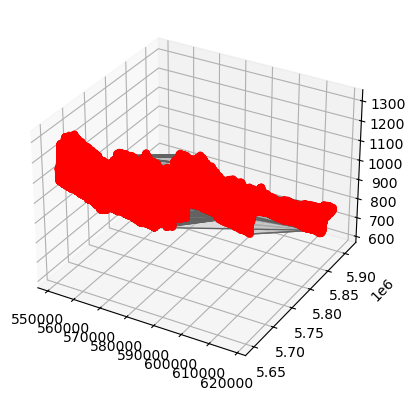

In [16]:
# testing data visualization
df = masspoint_new
X = df.iloc[:, 3] 
Y = df.iloc[:, 4] 
Z = df.iloc[:, 5] 
 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.plot_trisurf(X, Y, Z, color='white', edgecolors='grey', alpha=0.5) 
ax.scatter(X, Y, Z, c='red') 
plt.show()

KeyError: ' Ref'

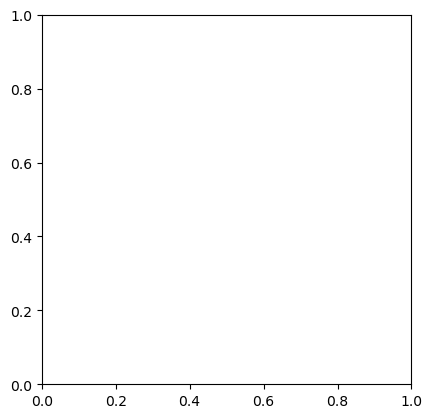

In [21]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

df = masspoint_new

geometry = [Point(xy) for xy in zip(df.iloc[:, 3], df.iloc[:, 4])]

gdf = geopandas.GeoDataFrame(df, geometry=geometry)

gdf.plot(column=' Ref')

plt.savefig('raster.tiff')